In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
ls

gdrive/  sample_data/


In [0]:
import os
os.chdir("gdrive/My Drive")

In [4]:
ls

det2.py            multi_class_.ipynb                               split.ipynb
images/            multi_class_lr0.001_epoch7_weight0004_gpu.ipynb  test.ipynb
Mask_RCNN/         multi.ipynb
Mask_RCNN-master/  single.ipynb


In [5]:
# Enable this for some more verbose info.
debugging = False
#import tensorflow as tf
from keras import backend as K
K.clear_session()

Using TensorFlow backend.


In [6]:
ROOT_DIR = os.path.abspath("./Mask_RCNN-master")
ROOT_IMAGE_DIR = os.path.abspath("./images/")
dataset_dir = os.path.join(ROOT_IMAGE_DIR, "fish/train")

print("base dataset dir:", dataset_dir)

base dataset dir: /content/gdrive/My Drive/images/fish/train


# Split_dataset


In [0]:
import os
import csv
import sys

sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils

In [0]:
def clean_name(file_name):
  file_name = file_name[:-6]
  name = file_name.replace("_", " ")
  name = name.replace("~", " ")
  name = name.rstrip()
  
  return name

def clean_dataset(file_list):
  file_names = list()
	
  for file_name in file_list:
    name = clean_name(file_name)
    file_names.append(name)
    
  return file_names

In [0]:
def get_classnames(file_names):
		"""
			1. 파일 이름 읽어옴 
			2. class_names 안에 이름 없으면 추가 
		"""
		class_names = list()
		for i in file_names:
			if i not in class_names:
				class_names.append(i)

		return class_names

In [0]:
def count_each_class(file_names, class_names):
		count = list()
		for i in class_names:
			count.append(file_names.count(i))

		return count

In [0]:
file_list = os.listdir(dataset_dir)
file_list.sort()
del file_list[0]

# 파일 이름에서 .jpg, _ 지우기
file_names = clean_dataset(file_list)
	
# 파일 이름에서 클래스 이름 가져오기 
class_names = get_classnames(file_names)

# 2. class별 개수 세기
count = count_each_class(file_names, class_names)

In [18]:
## check
for i in file_list:
	print(i)
print("파일 개수: " , len(file_list))

for i in file_names:
	print("파일 이름: ", i)

for i in class_names:
	print("클래스 이름: ", i)
print("클래스 개수: " , len(class_names))

for i in range(len(count)):
	print(i, count[i])

acanthopagrus_berda_2.jpg
acanthopagrus_berda_3.jpg
acanthopagrus_berda_4.jpg
acanthopagrus_berda_5.jpg
acanthopagrus_berda_6.jpg
aethaloperca_rogaa_1.jpg
aethaloperca_rogaa_2.jpg
aethaloperca_rogaa_3.jpg
aethaloperca_rogaa_4.jpg
aethaloperca_rogaa_5.jpg
aethaloperca_rogaa_6.jpg
파일 개수:  11
파일 이름:  acanthopagrus berda
파일 이름:  acanthopagrus berda
파일 이름:  acanthopagrus berda
파일 이름:  acanthopagrus berda
파일 이름:  acanthopagrus berda
파일 이름:  aethaloperca rogaa
파일 이름:  aethaloperca rogaa
파일 이름:  aethaloperca rogaa
파일 이름:  aethaloperca rogaa
파일 이름:  aethaloperca rogaa
파일 이름:  aethaloperca rogaa
클래스 이름:  acanthopagrus berda
클래스 이름:  aethaloperca rogaa
클래스 개수:  2
0 5
1 6


In [0]:
	# csv 파일 만들어 놓기 
	save_path = os.path.join(ROOT_DIR, "species.csv")
	f = open(save_path, 'w', encoding='utf-8', newline='')
	writer = csv.writer(f)
	writer.writerows(zip(class_names, count))
	f.close()

In [20]:
print(class_names)

['acanthopagrus berda', 'aethaloperca rogaa']


In [0]:
import math

In [22]:
train_n = list()

for i in range(len(count)):
  if(count[i] <5):
    n = math.floor(count[i]*0.8)
    train_n.append(n)
  else:
    n = math.ceil(count[i]*0.8)
    train_n.append(n)
  print(train_n)

[4]
[4, 5]


In [0]:
import random

def random_choice(count, train_n):
  choice = list()
  
  for i in range(train_n):
    number = random.randrange(1, count+1)
    while number in choice:
      number = random.randrange(1, count+1)
    choice.append(number)
    choice.sort()
    
  return choice
  

In [123]:
train_index = list()

for i in range(len(count)):
  choice = random_choice(count[i], train_n[i])
  train_index.append(choice)
  
print(train_n)
print(train_index)

[4, 5]
[[1, 3, 4, 5], [1, 2, 3, 4, 5]]


In [124]:
val_index = list()

for i in range(len(count)):
  no_choice = list()
  for j in range(1, count[i]+1):
    if j not in train_index[i]:
      no_choice.append(j)
  val_index.append(no_choice)

print(val_index)

[[2], [6]]


In [0]:
def generate_filename(class_names, index):
  full_names = list()
  
  for i in range(len(index)):
    name = class_names.replace(" ", "_")
    name = "%s_%d.jpg"%(name, index[i])
    full_names.append(name)
    
  return full_names
    

In [0]:
train_file = list()
val_file = list()
for i in range(len(class_names)):
  file_set = generate_filename(class_names[i], train_index[i])
  train_file.append(file_set)
  file_set = generate_filename(class_names[i], val_index[i])
  val_file.append(file_set)

In [151]:
print(train_file)
print(val_file)

[['acanthopagrus_berda_1.jpg', 'acanthopagrus_berda_3.jpg', 'acanthopagrus_berda_4.jpg', 'acanthopagrus_berda_5.jpg'], ['aethaloperca_rogaa_1.jpg', 'aethaloperca_rogaa_2.jpg', 'aethaloperca_rogaa_3.jpg', 'aethaloperca_rogaa_4.jpg', 'aethaloperca_rogaa_5.jpg']]
[['acanthopagrus_berda_2.jpg'], ['aethaloperca_rogaa_6.jpg']]


In [0]:
import numpy as np
import skimage

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon

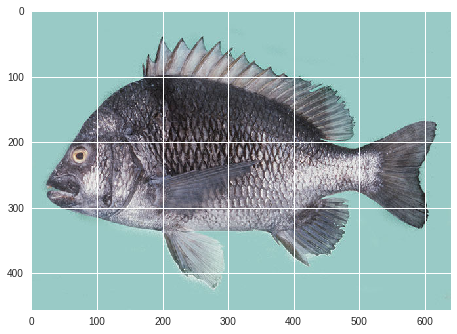

In [147]:
import PIL.Image as pilimg

dataset_dir = os.path.join(ROOT_IMAGE_DIR, "fish/train")

image_path = os.path.join(dataset_dir, train_file[0][3])
im = pilimg.open(image_path)

pix = np.array(im)
plt.imshow(pix)